In [64]:
import tensorflow_addons as tfa
from utils.explanations import integrated_gradients
from keras.utils import CustomObjectScope
import tensorflow.keras as keras
import tensorflow as tf
import os
from utils.explanations import minmax_norm
from utils.explanations import calculate_ig_attributions
from utils.utils import read_dataset
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt

archive = 'ucr'
dataset_name = 'Beef'
data_p = 'G:/Meine Ablage/master thesis/code/xai-tsc'
dataset = 'Beef'
model_type ='resnet'
ylen = 1
data = read_dataset(data_p, archive, dataset, 'original', ylen)[dataset]
ylen = len(data[0][0])
ig_data_stl  = read_dataset(data_p, archive, dataset, f'{model_type}_ig_raw', ylen)[dataset]
dataset = 'Beef'
itr = 0
#./results/ucr/Beef/experiment_2/resnet/resnet_mt_ae_0.25/resnet_ig_trf/best_model.hdf5
#results\ucr\Beef\experiment_2\resnet\resnet_mt_ae_0.25_0\resnet_ig_trf\df_best_model.csv
ig_link = f'./results/ucr/{dataset}/experiment_1/resnet/resnet_mt_ae_{itr}/resnet_ig_raw/best_model.hdf5'
#f'./results/ucr/{dataset}/experiment_2/resnet/resnet_mt_ae_0.25_{itr}/resnet_ig_raw/best_model.hdf5'
ig_model = keras.models.load_model(ig_link ,compile=False)

In [76]:
%matplotlib inline

for ts in range(len(ig_data_stl[1])): 
    print(ts)
    train_att = ig_data_stl[1] 
    sorted_vals = np.argsort(train_att[ts])
    xvals = ig_data_stl[1][ts]
    count = 230
    ytrue  = data[1][ts]

    pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
    #print(xvals)
    sup_array = []
    print(pred_label,ytrue[0]-1,ytrue[0]-1 == int(pred_label),ytrue[0])
    if ytrue[0] == int(pred_label)+1 and ytrue[0]==2: 
        for idx in range(0, len(sorted_vals), 2):
            print("Y")
            sup_x  = xvals.copy()
            #print(sorted_vals[:idx])
            #print(sorted_vals[:idx])
            sup_x[sorted_vals[:idx]] = 0
            sup_array.append(sup_x)
            #sup_x[sorted_vals[:idx]] = np.nan 
            # Indices of non-NaN values
            #not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
            # Linearly interpolate NaN values
            #interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
            #sup_array.append(interpolated_array)


        sup_array = np.array(sup_array)
        pred = ig_model.predict(sup_array)
        print(pred_label)
        #print(sup_array[50])
        #plt.plot(sup_array[140])
        #plt.plot(pred[0][:,pred_label])
    plt.show()



0
1/1 [==============================] - 0s 116ms/step
0 0.0 True 1.0
1
1/1 [==============================] - 0s 122ms/step
0 0.0 True 1.0
2
1/1 [==============================] - 0s 122ms/step
4 0.0 False 1.0
3
1/1 [==============================] - 0s 135ms/step
0 0.0 True 1.0
4
1/1 [==============================] - 0s 138ms/step
4 0.0 False 1.0
5
1/1 [==============================] - 0s 125ms/step
0 0.0 True 1.0
6
1/1 [==============================] - 0s 125ms/step
0 1.0 False 2.0
7
1/1 [==============================] - 0s 130ms/step
0 1.0 False 2.0
8
1/1 [==============================] - 0s 130ms/step
0 1.0 False 2.0
9
1/1 [==============================] - 0s 121ms/step
0 1.0 False 2.0
10
1/1 [==============================] - 0s 105ms/step
0 1.0 False 2.0
11
1/1 [==============================] - 0s 122ms/step
0 1.0 False 2.0
12
1/1 [==============================] - 0s 120ms/step
0 2.0 False 3.0
13
1/1 [==============================] - 0s 123ms/step
0 2.0 False 3.0
14
1/1

In [77]:
train_att = ig_data_stl[1] 
ts = 20
sorted_vals = np.argsort(train_att[ts])
xvals = ig_data_stl[0][ts]
count = 230
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
#print(xvals)
sup_array = []
for idx in range(0, len(sorted_vals), 2):
    sup_x  = xvals.copy()
    #print(sorted_vals[:idx])
    #print(sorted_vals[:idx])
    sup_x[sorted_vals[:idx]] = np.nan 
    # Indices of non-NaN values
    not_nan_indices = np.arange(len(sup_x))[~np.isnan(sup_x)]
    # Linearly interpolate NaN values
    interpolated_array = np.interp(np.arange(len(sup_x)), not_nan_indices, sup_x[not_nan_indices])
    sup_array.append(interpolated_array)


sup_array = np.array(sup_array)
pred = ig_model.predict(sup_array)
#print(sup_array[50])
#plt.plot(sup_array[140])
print(pred_label)

#plt.plot(pred[:,pred_label])
#plt.show()


8/8 [==============================] - 1s 107ms/step
0


15/15 [==============================] - 1s 87ms/step


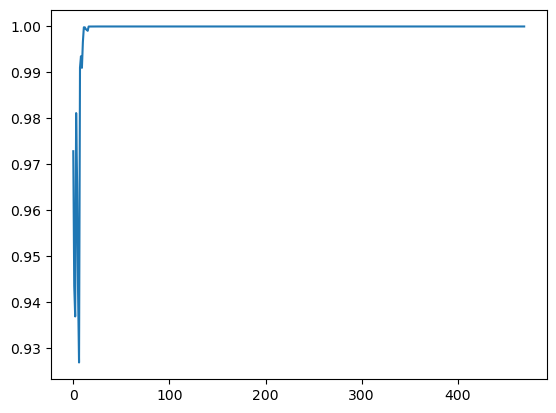

In [84]:

train_att = ig_data_stl[1] 
ts = 11
xvals = ig_data_stl[0][ts]
ytrue  = data[1][ts]
pred_label = np.argmax(ig_model.predict(ig_data_stl[0])[0][ts])
sorted_values = np.sort(xvals)[::-1]
baseline = np.zeros(470)
helper_array = []
for idx in range(0, len(sorted_vals), 1):
    baseline[idx] = sorted_vals[idx]
    helper_array.append(baseline.copy())


add_att = ig_model.predict(np.array(helper_array))[0][:,pred_label]
#[:,pred_label]

plt.plot(add_att)

In [ ]:
"""
supp_x_vals_pred = []
for xv, pa in zip(x,p[1]):
    pa = pa.flatten()
    supp_x  = xv.copy()
    sorted = replace#(np.argsort(pa)[::-1][int(len(pa)*keep):])
    supp_x[sorted] = 0 #supp_strat[sorted]
    supp_x_vals_pred.append(supp_x)
"""